# 3. Datentransformation – Data Understanding und Data Preparation
## Anforderungen an Projektumsetzung: Datentransformation
----
- Führen Sie zwei DataFrames mit `merge` zusammen - wenn Sie nur ein DataFrame haben, können Sie z.B. eine Konvertierungstabelle erstellen und anspielen (z.B. Land zu Kontinent)
- Erstellen Sie eine Pivot-Tabelle
- Überlegen Sie sich je mind. eine Analyse, die von den vorherigen Schritten ermöglicht werden. Erstellen Sie dazu Visualisierungen und fassen die Erkenntnisse zusammen

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

apps = pd.read_csv("Daten/Google-Playstore.csv")

---
**AUFGABE:**

Führen Sie zwei DataFrames mit `merge` zusammen - wenn Sie nur ein DataFrame haben, können Sie z.B. eine Konvertierungstabelle erstellen und anspielen (z.B. Land zu Kontinent)

In [2]:
# Verwerende Daten aus Abschnitt 2.) Datenexploration
apps_in_kb = apps.copy()
apps_in_kb = apps[apps.Size.str.contains('k', na=False)].copy()
apps_in_kb["Size"]

apps_in_kb["Size"] = apps_in_kb["Size"].str.replace("k", "")
apps_in_kb["Size"] = apps_in_kb["Size"].str.replace(",", "")
apps_in_kb["Size"]= pd.to_numeric(apps_in_kb["Size"], errors='raise')
apps_in_kb["Size"] = apps_in_kb["Size"] / 1000.0
apps_in_kb["Size"]

apps_in_mb = apps.copy()
apps_in_mb = apps_in_mb[apps_in_mb.Size.str.contains('M', na=False)].copy()
apps_in_mb["Size"] = apps_in_mb["Size"].str.replace("M", "")
apps_in_mb["Size"] = apps_in_mb["Size"].str.replace(",", "")
apps_in_mb["Size"]= pd.to_numeric(apps_in_mb["Size"], errors='raise')

apps_varies = apps.copy()
apps_varies = apps_varies[apps_varies.Size.str.contains('Varies with device', na=False)].copy()
apps_varies["Size"] = apps_varies["Size"].str.replace("Varies with device", "0.0")
apps_varies["Size"]= pd.to_numeric(apps_varies["Size"], errors='raise')

apps_concated = pd.concat([apps_in_kb, apps_in_mb, apps_varies], ignore_index = False )
apps_concated.Size  # NaN Werte nicht enthalten
apps_concated = pd.concat([apps_in_kb, apps_in_mb, apps_varies], ignore_index = False )
apps_concated.Size  # NaN Werte nicht enthalten

size = apps_concated.Size

In [3]:
conv_in_mb = apps.merge(size, left_index = True, right_index = True)
conv_in_mb.loc[0:10 , 'Size_x':'Size_y']

,Size_x,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Size_y
0,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,10.0
1,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,2.9
2,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,3.7
3,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,1.8
4,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,6.2
5,46M,6.0 and up,Imocci GmbH,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35,46.0
6,2.5M,4.1 and up,android developer779,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35,2.5
7,16M,5.0 and up,Mozaix LLC,NaN,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35,16.0
8,1.3M,4.4 and up,Yilver Molina Hurtatiz,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35,1.3
9,3.5M,4.1 and up,Free 2021 Themes for Emoji keyboard,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35,3.5


In [4]:
# Überprüfung ob Merge funktioniert hat
conv_in_mb.loc[4, ['Size_x', 'Size_y']] 

Size_x    6.2M
Size_y     6.2
Name: 4, dtype: object

---
**AUFGABE:**

Erstellen Sie eine Pivot-Tabelle.

In [6]:
# Apps werden zunächst gruppiert
cat_groups = conv_in_mb.groupby('Category')
cat_groups['Category'].count()

Category
Action                      27547
Adventure                   23196
Arcade                      53784
Art & Design                18538
Auto & Vehicles             18278
Beauty                      11771
Board                       10588
Books & Reference          116726
Business                   143761
Card                         8179
Casino                       5076
Casual                      50797
Comics                       2862
Communication               48159
Dating                       6523
Education                  241075
Educational                 21304
Entertainment              138268
Events                      12839
Finance                     65456
Food & Drink                73920
Health & Fitness            83501
House & Home                14369
Libraries & Demo             5196
Lifestyle                  118324
Maps & Navigation           26722
Medical                     32063
Music                        4202
Music & Audio              154898
News 

In [13]:
# Neue Spalte Raiting_bins wird erstellt, um
# die Bewertungen in Klassen einteilen zu können
conv_in_mb['Rating_bins'] = pd.cut(conv_in_mb.Rating, [0.0, 0.99, 2.0, 3.0, 4.0, 5.0], include_lowest=True)
conv_in_mb.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Size_y,Rating_bins
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,10.0,"(-0.001, 0.99]"
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,2.9,"(4.0, 5.0]"
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,3.7,"(-0.001, 0.99]"
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,1.8,"(4.0, 5.0]"
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,6.2,"(-0.001, 0.99]"


In [15]:
# In dieser Pivottabelle wird die Spalte 'Category' gruppiert, um als Zeilen-Labels verwendet zu werden
# dann wird sie Spalte 'Rating_bins' ebenso gruppiert, um als Spaltennamen verwendet zu werden.
# Die 'App Id' ist die Spalte, aus welche die Werte für Aggregation (count-zählen) geholt werden
pivot_apps_bins = conv_in_mb.pivot_table(index='Category', columns='Rating_bins', values='App Id', aggfunc='count',fill_value=0 )
pivot_apps_bins

Rating_bins,"(-0.001, 0.99]","(0.99, 2.0]","(2.0, 3.0]","(3.0, 4.0]","(4.0, 5.0]"
Category,,,,,
Action,8714,110,1056,7990,8954
Adventure,7054,73,869,6001,8789
Arcade,22392,168,1306,8483,20358
Art & Design,9368,203,864,3016,4941
Auto & Vehicles,8493,266,1194,3471,4527
Beauty,7566,80,326,1421,2306
Board,3301,44,366,2725,4007
Books & Reference,49454,407,2515,13802,50315
Business,91652,1137,4930,15228,29204


---
**AUFGABE:**

Überlegen Sie sich je mind. eine Analyse, die von den vorherigen Schritten ermöglicht werden. Erstellen Sie dazu Visualisierungen und fassen die Erkenntnisse zusammen.
- Mit diesem Stacked Bar-Chart werden die Anteile innerhalb der jeweiligen App-Kategorie visualisiert, wie viele Apps sind in welcher Rating-Kategorie befinden.
- Aufgrund der vielen Daten, leider keine klaren Grenzen bzw. die wirkliche App_Anzhal zwischen den Rating-Kategorien ersichtlich

/tmp/ipykernel_298/2241331078.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pivot_apps_bins.index, rotation=90)


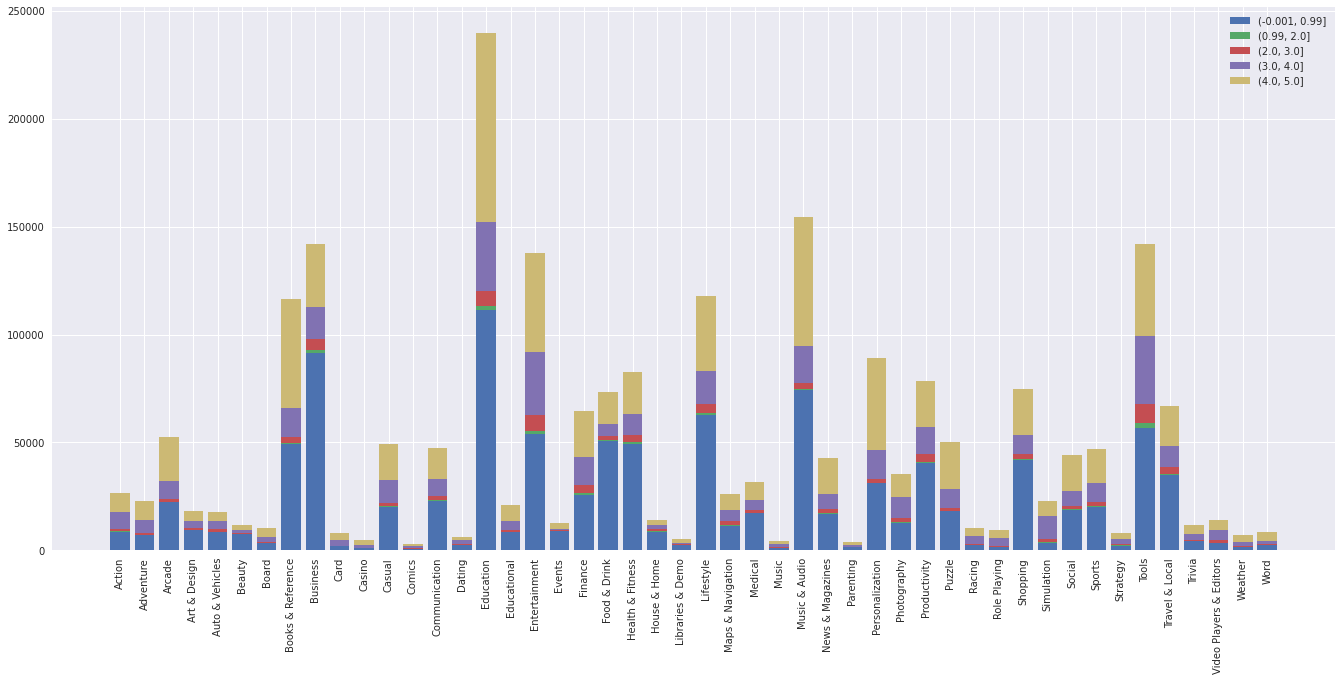

In [9]:
# Stacked-Bar-Chart innerhalb einer Kategorie
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(23,10))
pal = sns.color_palette("tab20")

bottom=pivot_apps_bins[pivot_apps_bins.columns[0]] - pivot_apps_bins[pivot_apps_bins.columns[0]]
for column in pivot_apps_bins.columns:
    ax.bar(pivot_apps_bins.index, pivot_apps_bins[column], bottom=bottom, label=f'{column}')
    bottom += pivot_apps_bins[column]

ax.set_xticklabels(pivot_apps_bins.index, rotation=90)
plt.legend()
plt.show()

### Annahme für den Stacked-Bar-Chart
**Wir sind App-Entwickler und unsere App befindet sich seit einem Monat auf dem Markt.**

**Eigenschaften der App:**
 - **Kategorie:**      Finance
 - **Free of Charge:** True
 - **Rating:**         4.1
 

Mit diesem Box-Plot wollen wir analysieren, ob sich unsere Finance App innerhalb der selben Kategorie über- oder unterdurchschnittlich bewertet wurde. Mit einer unterdurchschnittlichen Bewertung sollte die Strategie überdacht und mit Konkurrenzprodukten verglichen werden. Bei überdurchschnittlicher Bewertung sind vorerst keine Updates oder weiteren Features notwendig. 

In [53]:
pivot_apps_conv = conv_in_mb.pivot_table(index='Rating_bins', columns='Category', values='App Id', aggfunc='count',fill_value=0 )
pivot_apps_conv

Category,Action,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Business,Card,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
Rating_bins,,,,,,,,,,,,,,,,,,,,,
"(-0.001, 0.99]",8714,7054,22392,9368,8493,7566,3301,49454,91652,1884,...,3594,18801,20259,2271,56922,34923,4485,3332,1703,2666
"(0.99, 2.0]",110,73,168,203,266,80,44,407,1137,27,...,230,322,366,55,1987,631,55,200,57,23
"(2.0, 3.0]",1056,869,1306,864,1194,326,366,2515,4930,347,...,1622,1555,1869,437,8992,2953,386,1367,240,219
"(3.0, 4.0]",7990,6001,8483,3016,3471,1421,2725,13802,15228,2469,...,10454,6849,8918,2459,31254,10059,2486,4572,1895,1476
"(4.0, 5.0]",8954,8789,20358,4941,4527,2306,4007,50315,29204,3319,...,6823,16517,15640,3015,42817,18101,4277,4454,3235,4141


In [64]:
pivot_apps_conv.loc['(4.0, 5.0]','Finance']

KeyError: '(4.0, 5.0]'

In [65]:
pivot_apps_conv.loc['Rating_bins' == '(4.0, 5.0]','Finance']
# Zeigt nicht den richtigen Wert an

25711

In [67]:
finance_total = pivot_apps_conv['Finance'].sum()

Q1 = pivot_apps_conv.loc[:,'Finance'].quantile(0.25)
Q2 = pivot_apps_conv.loc[:,'Finance'].quantile(0.75)
upper_threshold = Q2 + 1.5 * (Q2 - Q1)
print("Schwellenwert: " + str(upper_threshold) + '\n')

Schwellenwert: 48026.5



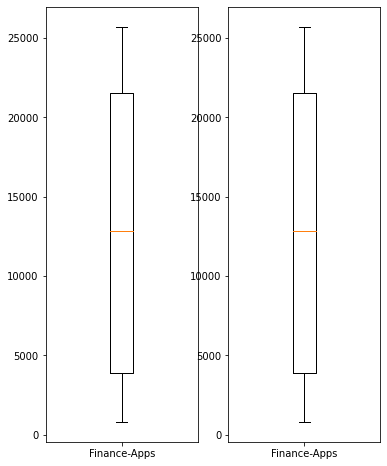

In [69]:
pivot_apps_conv48030 = pivot_apps_conv[pivot_apps_conv['Finance'] <= 48030]
fig, ax = plt.subplots(ncols=2, figsize=(6,8))
ax[0].boxplot(pivot_apps_conv.loc[:,'Finance'], labels=['Finance-Apps'])
ax[1].boxplot(pivot_apps_conv48030['Finance'], labels=['Finance-Apps'])
plt.show()